In [9]:
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib
import random as rand
from matplotlib import pyplot as plt
from itertools import product
import itertools
import time
import re
import csv
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
import statsmodels.api as sm
import tqdm

%matplotlib inline

In [10]:
plt.rcParams["axes.labelsize"] = 16. 
plt.rcParams["xtick.labelsize"] = 14. 
plt.rcParams["ytick.labelsize"] = 14. 
plt.rcParams["legend.fontsize"] = 12. 
plt.rcParams["figure.figsize"] = [17., 8.]

## Import CSV data
With DDPG agent

In [11]:
data_ddpg = pd.read_csv('data/comparing_rows/agent_with_ddpg_0.05.csv')
data_ddpg.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


And without DDPG agent

In [12]:
data_default = pd.read_csv('data/comparing_rows/agent_without_ddpg.csv')
data_default.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0


------
Returns data

In [13]:
data_ddpg['returns'] = data_ddpg["price"].pct_change()
data_default['returns'] = data_default["price"].pct_change()

### DDPG price and returns

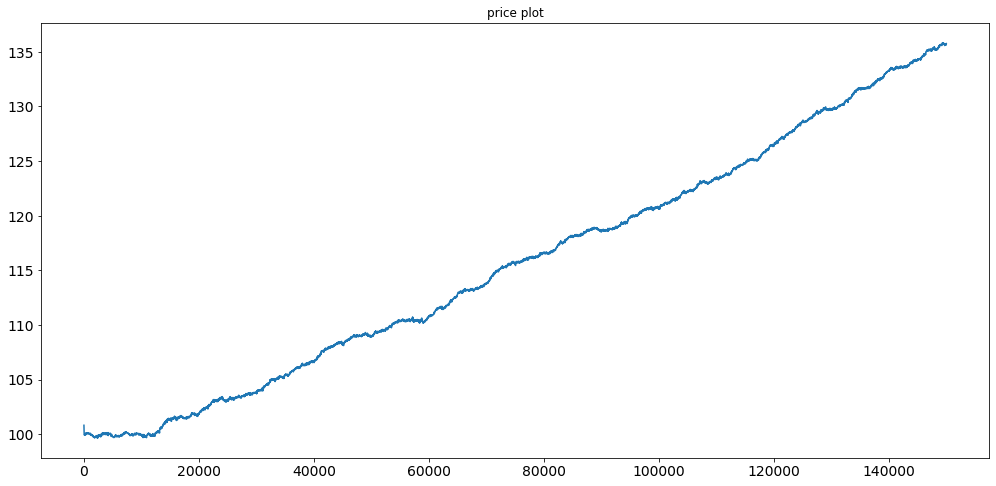

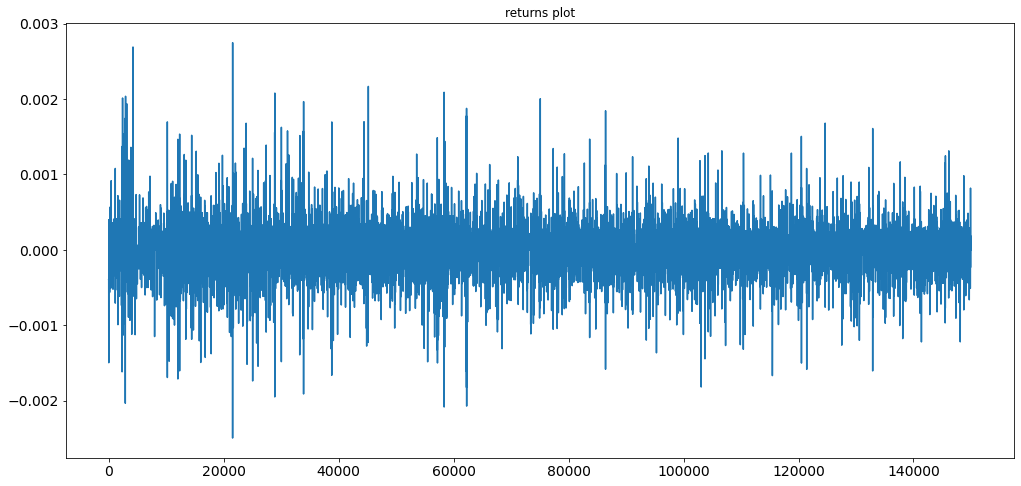

In [14]:
plt.plot(data_ddpg['price'])
plt.title('price plot')
plt.show()

plt.plot(data_ddpg['returns'])
plt.title('returns plot')
plt.show()

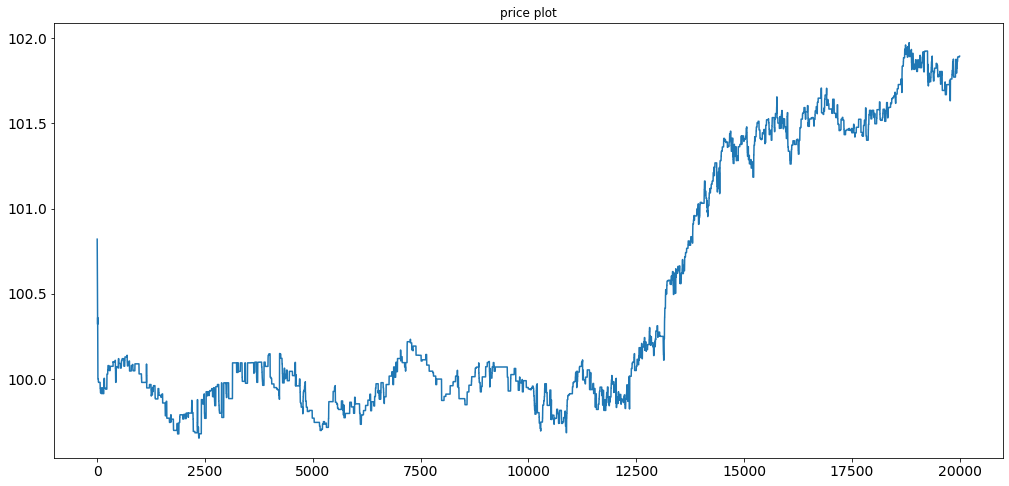

In [16]:
plt.plot(data_ddpg['price'][:20000])
plt.title('price plot')
plt.show()

### Default price and returns

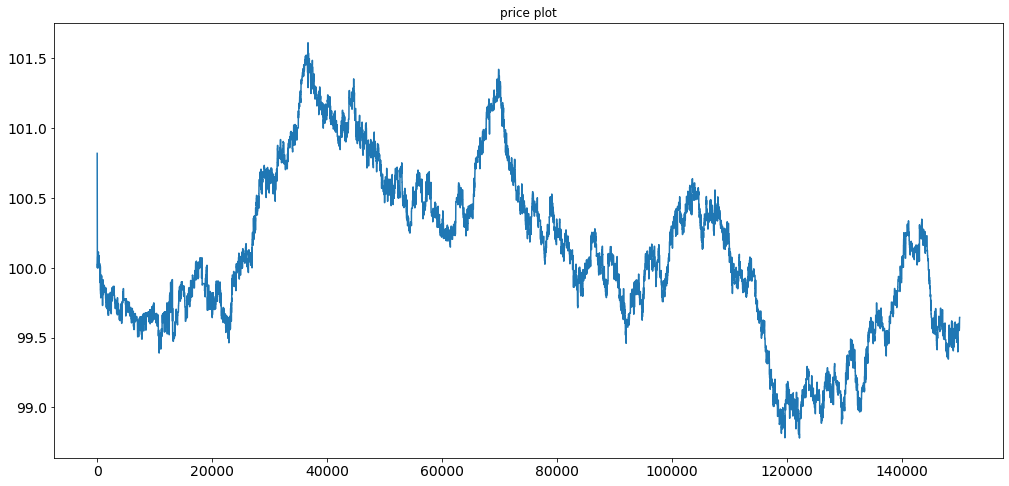

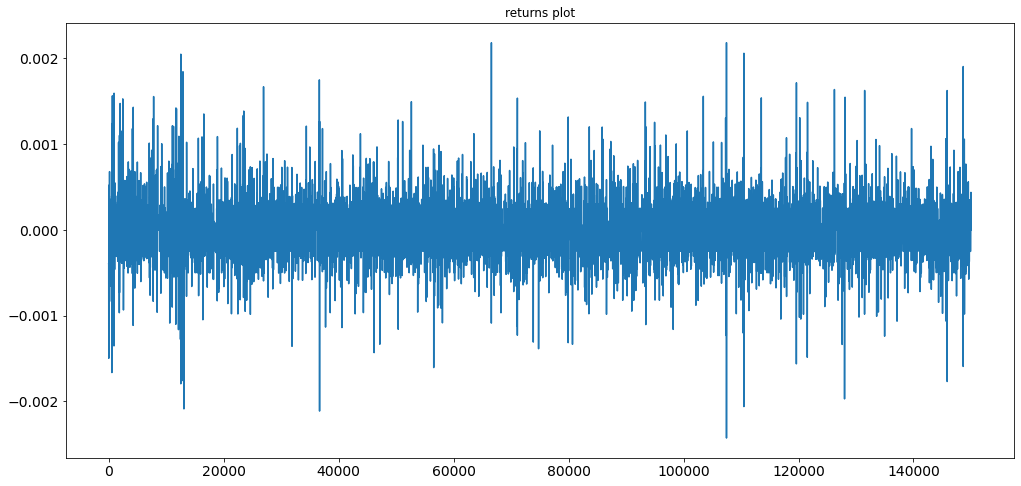

In [8]:
plt.plot(data_default['price'])
plt.title('price plot')
plt.show()

plt.plot(data_default['returns'])
plt.title('returns plot')
plt.show()

-------
## Fat tailed distribution comparing  

Let use kurtosis value (4'th moment) to calculate value of the tail of returns

In [9]:
kurt_list_ddpg = [data_ddpg["price"].pct_change(k).kurt() for k in range(3000)]
kurt_list_default = [data_default["price"].pct_change(k).kurt() for k in range(3000)]

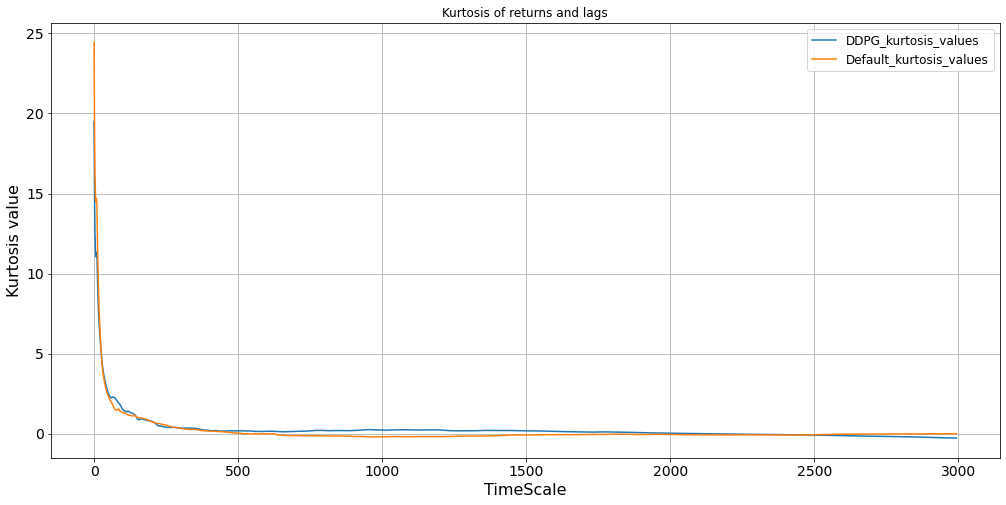

In [10]:
plt.plot(kurt_list_ddpg[5:], label = 'DDPG_kurtosis_values')
plt.plot(kurt_list_default[5:], label = 'Default_kurtosis_values')
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.legend()
plt.show()

Along the abscissa axis, the kurtosis value readings are plotted depending on the degree of differentiation of the series

------
## Volatility clustering comparing  

We can use autocorrealtion of squared returns function as measure of volatility clustering (ARCH effect)  

Also we can use returns in other degrees to calculate other data (GARCH effect).

Default plot

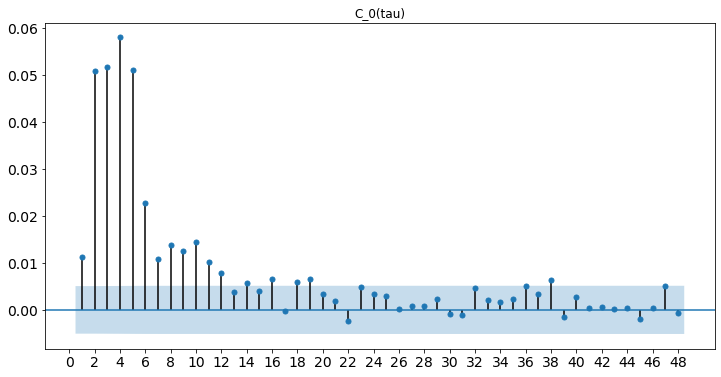

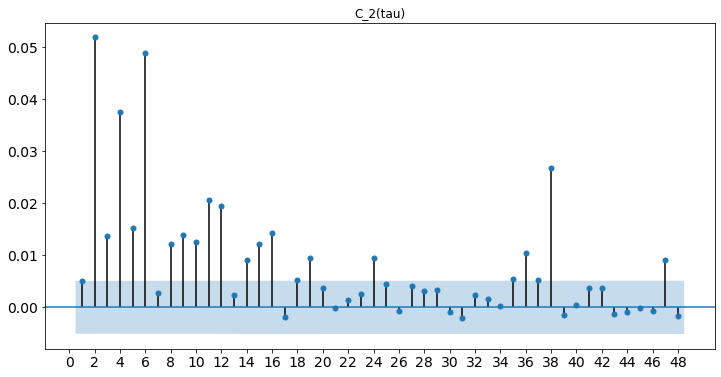

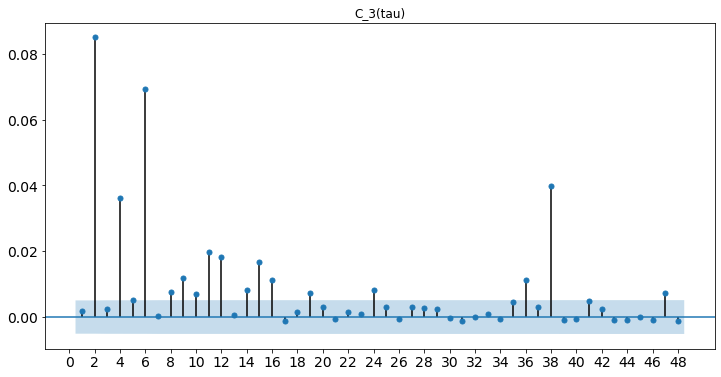

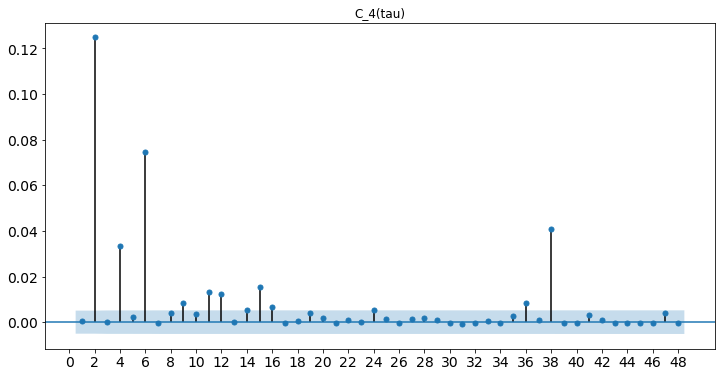

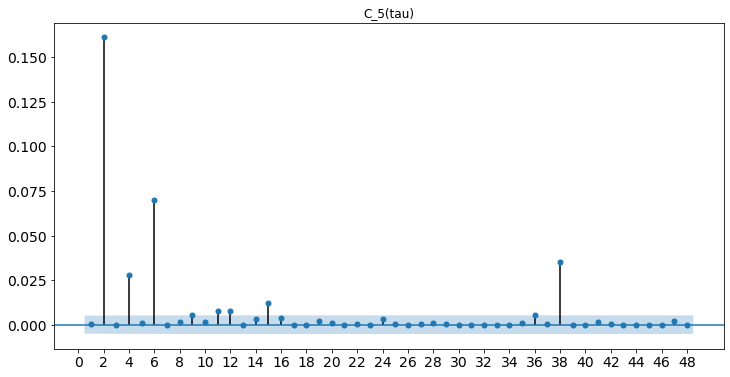

In [11]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(np.log(1+abs(data_default['returns'].fillna(0))), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_0(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_2(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**3), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_3(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**4), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_4(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**5), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_5(tau)')
plt.show()

DDPG plot

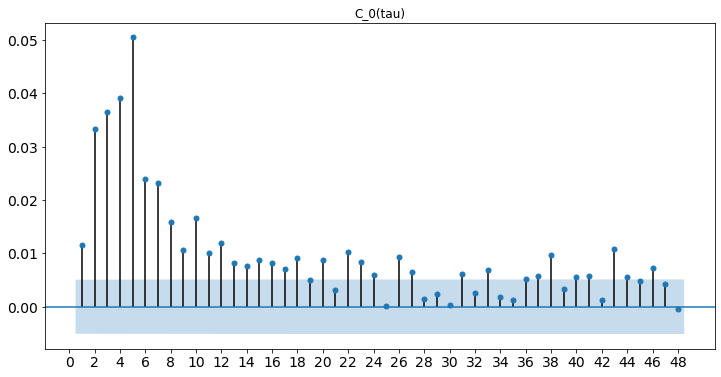

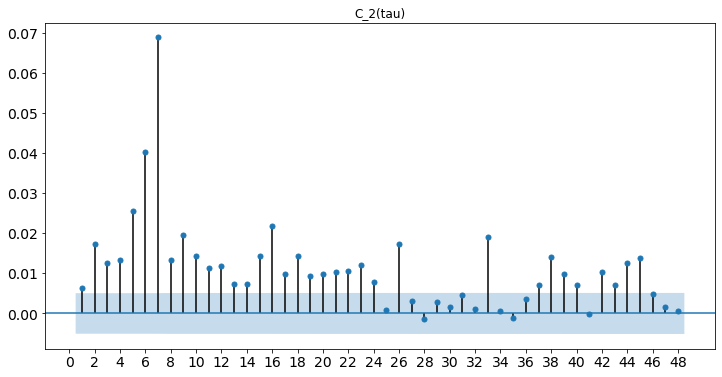

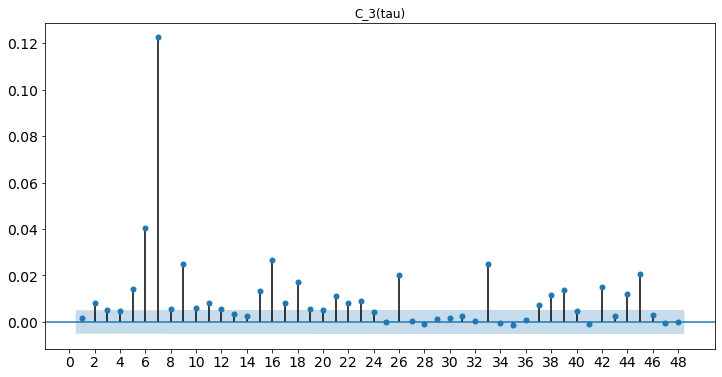

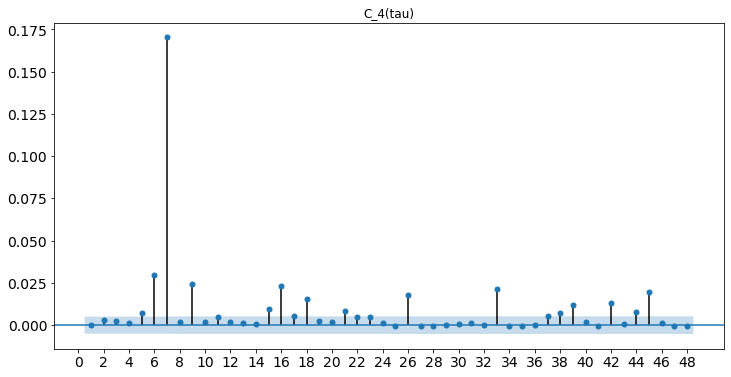

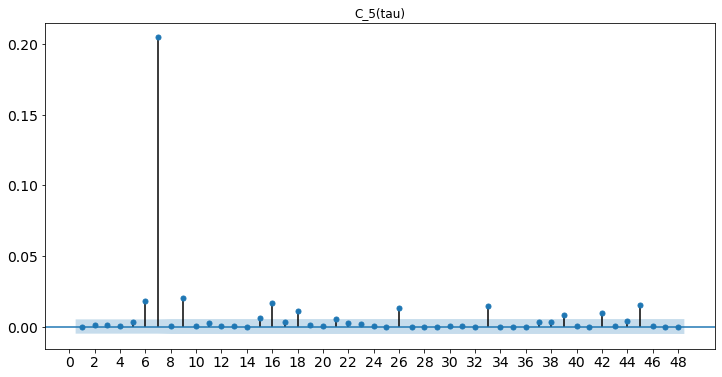

In [12]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(np.log(1+abs(data_ddpg['returns'].fillna(0))), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_0(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_2(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**3), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_3(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**4), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_4(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**5), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_5(tau)')
plt.show()

-----
## Autocorrelation of returns

We'll observe simple linear cutocorrelation of returns and squared autocorrelation of returns.

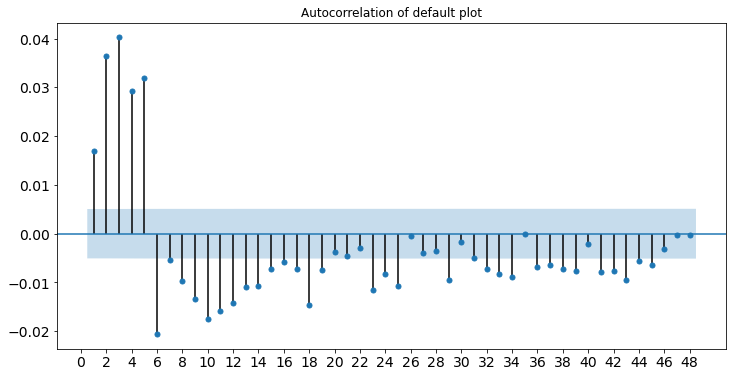

Dickey—Fuller_test_value: p=0.000000


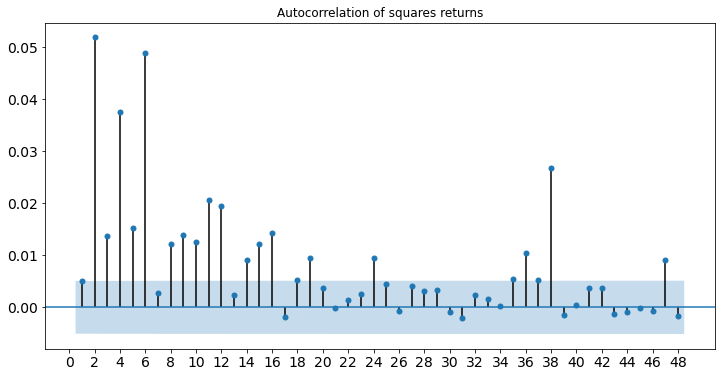

Dickey—Fuller_test_value: p=0.000000


In [12]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of default plot')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0))[1])

########

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0)**2)[1])

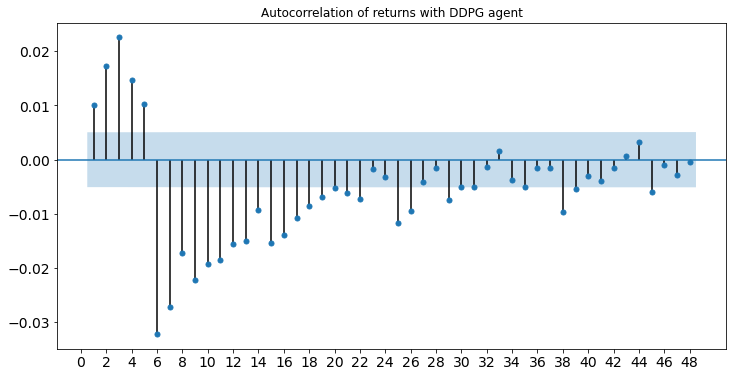

Dickey—Fuller_test_value: p=0.000000


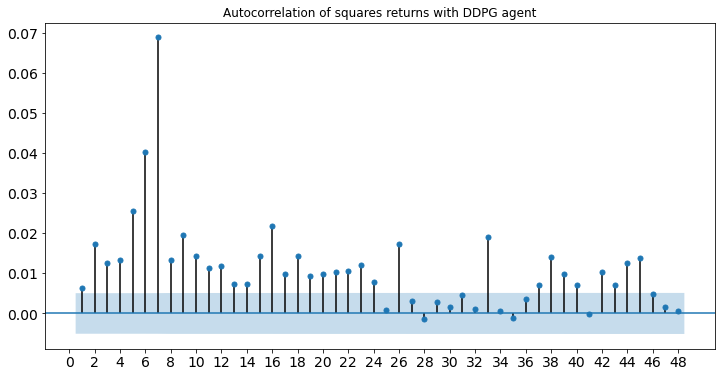

Dickey—Fuller_test_value: p=0.000000


In [13]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of returns with DDPG agent')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_ddpg['returns'].fillna(0))[1])

########

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns with DDPG agent')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_ddpg['returns'].fillna(0)**2)[1])

----
## Q-Q plot values  
Here we use Q-Q plot to observe comparisons of sampled quantiles obtained during the implementation of our process with the normal distribution (???)  (Normal or Gaussian, what will be better?)

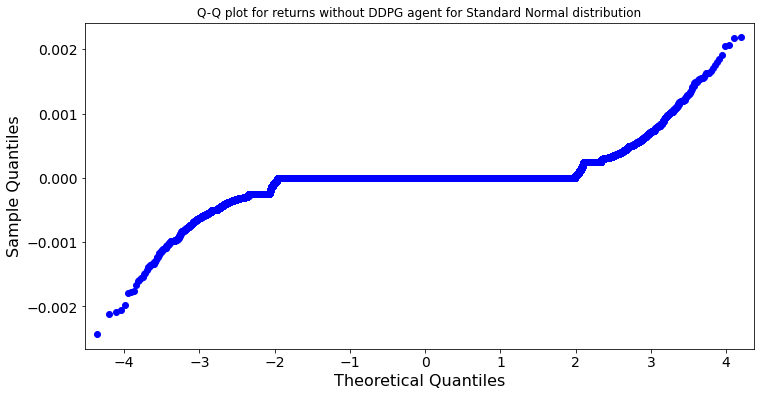

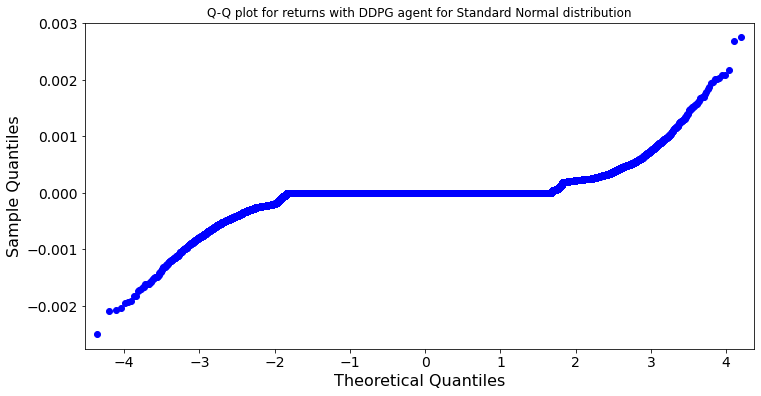

In [14]:
sm.qqplot(data_default['returns'])
plt.title('Q-Q plot for returns without DDPG agent for Standard Normal distribution')
plt.show()
sm.qqplot(data_ddpg['returns'])
plt.title('Q-Q plot for returns with DDPG agent for Standard Normal distribution')
plt.show()

------
### ECDF Plotting  

Let build empirical cumulative distribution function (ECDF) to compare 2 cumulative distributions

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
ecdf_default = ECDF(data_default['returns'].fillna(0))
ecdf_ddpg = ECDF(data_ddpg['returns'].fillna(0))

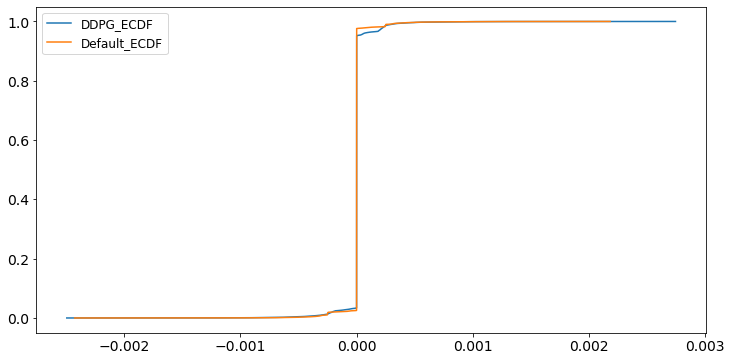

In [17]:
plt.plot(ecdf_ddpg.x, ecdf_ddpg.y, label = 'DDPG_ECDF')
plt.plot(ecdf_default.x, ecdf_default.y, label = 'Default_ECDF')
plt.legend()
plt.show()

------
## Hill estimating  
for returns!

In [6]:
statistics_order = np.sort(data_default['returns'].fillna(0))

In [7]:
hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_default['returns'].fillna(0))))[:k]) - np.log(
    abs(np.sort(data_default['returns'].fillna(0))))[k]

hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_ddpg['returns'].fillna(0))))[:k]) - np.log(
    abs(np.sort(data_ddpg['returns'].fillna(0))))[k]

#Add one number

hill_estimator_default_one = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_default['returns'].fillna(0))+1))[:k]) - np.log(
    abs(np.sort(data_default['returns'].fillna(0))+1))[k]

hill_estimator_ddpg_one = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_ddpg['returns'].fillna(0))+1))[:k]) - np.log(
    abs(np.sort(data_ddpg['returns'].fillna(0))+1))[k]

Do we want to use module values here?

<ipython-input-19-fea3aae59020>:1: RuntimeWarning: divide by zero encountered in log
  hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-19-fea3aae59020>:2: RuntimeWarning: divide by zero encountered in log
  data_default['returns'].fillna(0))))[:k]) - np.log(
<ipython-input-19-fea3aae59020>:1: RuntimeWarning: invalid value encountered in double_scalars
  hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-19-fea3aae59020>:5: RuntimeWarning: divide by zero encountered in log
  hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-19-fea3aae59020>:6: RuntimeWarning: divide by zero encountered in log
  data_ddpg['returns'].fillna(0))))[:k]) - np.log(
<ipython-input-19-fea3aae59020>:5: RuntimeWarning: invalid value encountered in double_scalars
  hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(


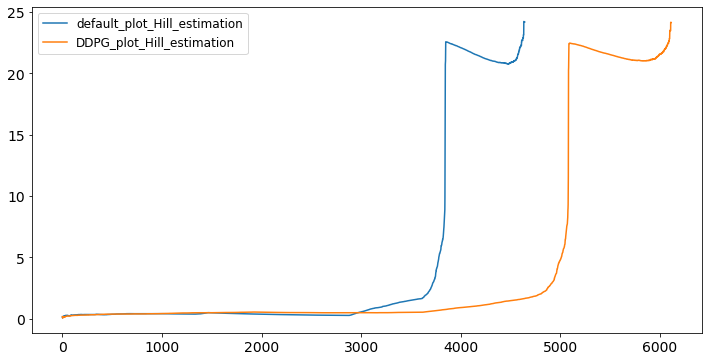

In [20]:
plt.plot([hill_estimator_default(t) for t in range(1, 10000)], label = 'default_plot_Hill_estimation')
plt.plot([hill_estimator_ddpg(t) for t in range(1, 10000)], label = 'DDPG_plot_Hill_estimation')
plt.legend()
plt.show()

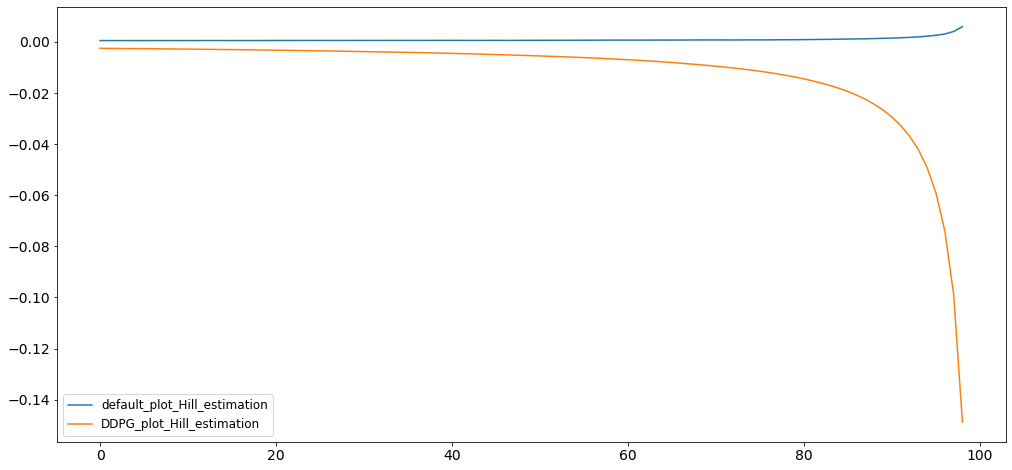

In [8]:
plt.plot([hill_estimator_default_one(t) for t in range(-100, -1)], label = 'default_plot_Hill_estimation')
plt.plot([hill_estimator_ddpg_one(t) for t in range(-100, -1)], label = 'DDPG_plot_Hill_estimation')
plt.legend()
plt.show()

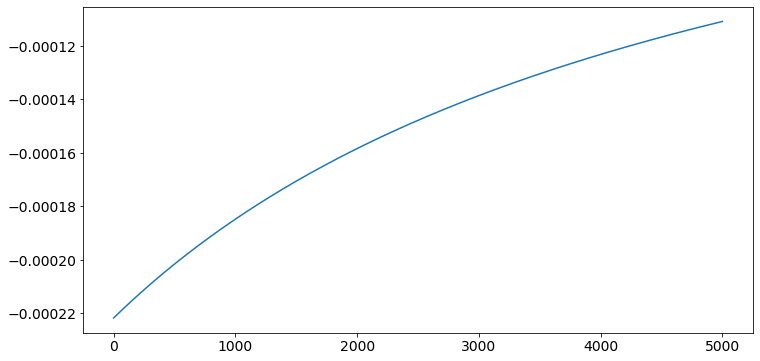

In [21]:
plt.plot([hill_estimator_default_one(ky) for ky in range(5000, 10000)])
plt.show()

In [22]:
ten_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.1)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.1))])
fifty_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.5)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.5))])
ninety_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.9)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.9))])

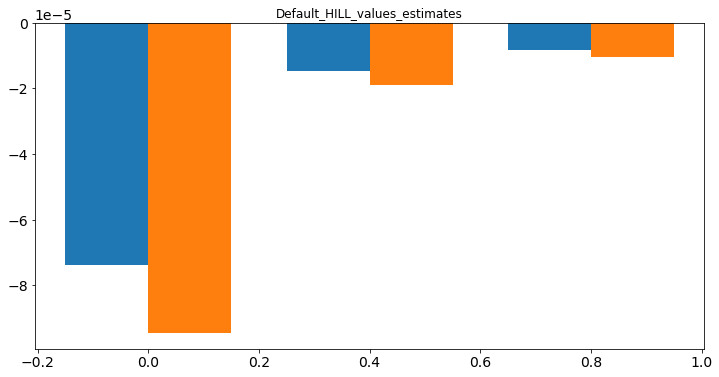

In [23]:
ax1 = np.transpose([ten_percent, fifty_percent, ninety_percent])[0]
ax2 = np.transpose([ten_percent, fifty_percent, ninety_percent])[1]
labels = [0.1, 0.5, 0.9]
x = np.arange(0, 1, 0.4)
width = 0.15

fig, ax = plt.subplots()
react1 = ax.bar(x-width/2, ax1, width)
react2 = ax.bar(x+width/2, ax2, width)
#ax.set_xticklabels(labels)
ax.set_title("Default_HILL_values_estimates")
plt.show()